I am going to implement some of the concepts deal in this online course from Stanford University: https://www.coursera.org/learn/social-economic-networks/

# Week 2
We are going to explore

- Thresholds and Phase Transitions
- Application – Diffusion Centrality (I will be in debt with it, I need to find some data to apply this concept)

(The concept below were dealt in the previous notebook)
- Create a real graph using the movie data!
- Centrality

We were exploring power of graph, step by step
We are going to use the metadata.json from https://grouplens.org/datasets/movielens/tag-genome-2021/

In particular this part is the important one:


**raw/metadata.json**

The file contains information about movies from MovieLens - 84,661 lines of json objects that have the following fields:
- title – movie title (84,484 unique titles)
- directedBy – directors separated by comma (‘,’)
- starring – actors separated by comma (‘,’)
- dateAdded – date, when the movie was added to MovieLens
- avgRating – average rating of a movie on MovieLens
- imdbId – movie id on the IMDB website (84,661 unique ids)
- item_id – movie id, which is consistent across files (84,661 unique ids)
- Example line:

{"title": "Toy Story (1995)", "directedBy": "John Lasseter", "starring": "Tim Allen, Tom Hanks, Don Rickles, Jim Varney, 
John Ratzenberger, Wallace Shawn, Laurie Metcalf, John Morris, R. Lee Ermey, Annie Potts", "dateAdded": null, "avgRating":
3.89146, "imdbId": "0114709", "item_id": 1}

So what we are going to do it is to assume that all actors that appear in the same movies are connected to each other together with their director. 
This is just an interesting exercise to do. This is the first iteration, and we are going to see if we can find the "most connected actors/actresses or director" according to this metric.

In [1]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import operator
# to easily creade the connection between nodes
from itertools import combinations
# save graph and other dictionaries difficult to get
import pickle
import math

In [2]:
# load graph object from file
G = pickle.load(open('filename.pickle', 'rb'))

## Connectedness
Something that we didn't check in the last notebook was if our network was fully connected. That is to say if were able to go to anywhere to anywhere else. We are going explore that in this notebook.


In [3]:
len(G)

5140

In [4]:
G0 = nx.connected_components(G)
connected_networks_len = [len(c) for c in sorted(G0, key=len, reverse=True)] 
print(connected_networks_len)
print(len(connected_networks_len))

[5125, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
16


In [5]:
G0 = nx.connected_components(G)
next(G0)
i =1
while i <16:
    print(next(G0))
    i = i + 1

{'DzigaVertov'}
{'NormanMcLaren'}
{'FrederickWiseman'}
{'SegundodeChomón'}
{'GeorgesMéliès'}
{'JamesH.White'}
{'WilliamK.L.Dickson'}
{'TakashiIto'}
{'StanBrakhage'}
{'KemalSunal'}
{'LouisTheroux'}
{'LavDiaz'}
{'LotteReiniger'}
{'ChristianGonzález'}
{'AlexandrePromio'}


Probably this actors were connected to other actors who appear in just a few movies and were deleted. We have to delete them because the calculation in the graph are expensive calculation. But anyway, this actors were not highly connected because their contacts were not well connected. (this is obviously giving the datatime of the data we analyse)

## Thresholds and Phase Transitions

We are going to return to random graph, but we are going to explore some thresholds. These thresholds if they held true we will observed certains behavious in our graph.

**n is the number of nodes**
so if the probability of forming a link between nodes is bigger than these thresholds we have:

#### the network has somelinks
thresholds_1 = 1/n^2

#### the network has components with at least three links
thresholds_2 = 1/n^(3/2)

#### the network creates a cycles
thresholds_3 = 1/n

#### the network is conected
thresholds_4 = log(n)/n


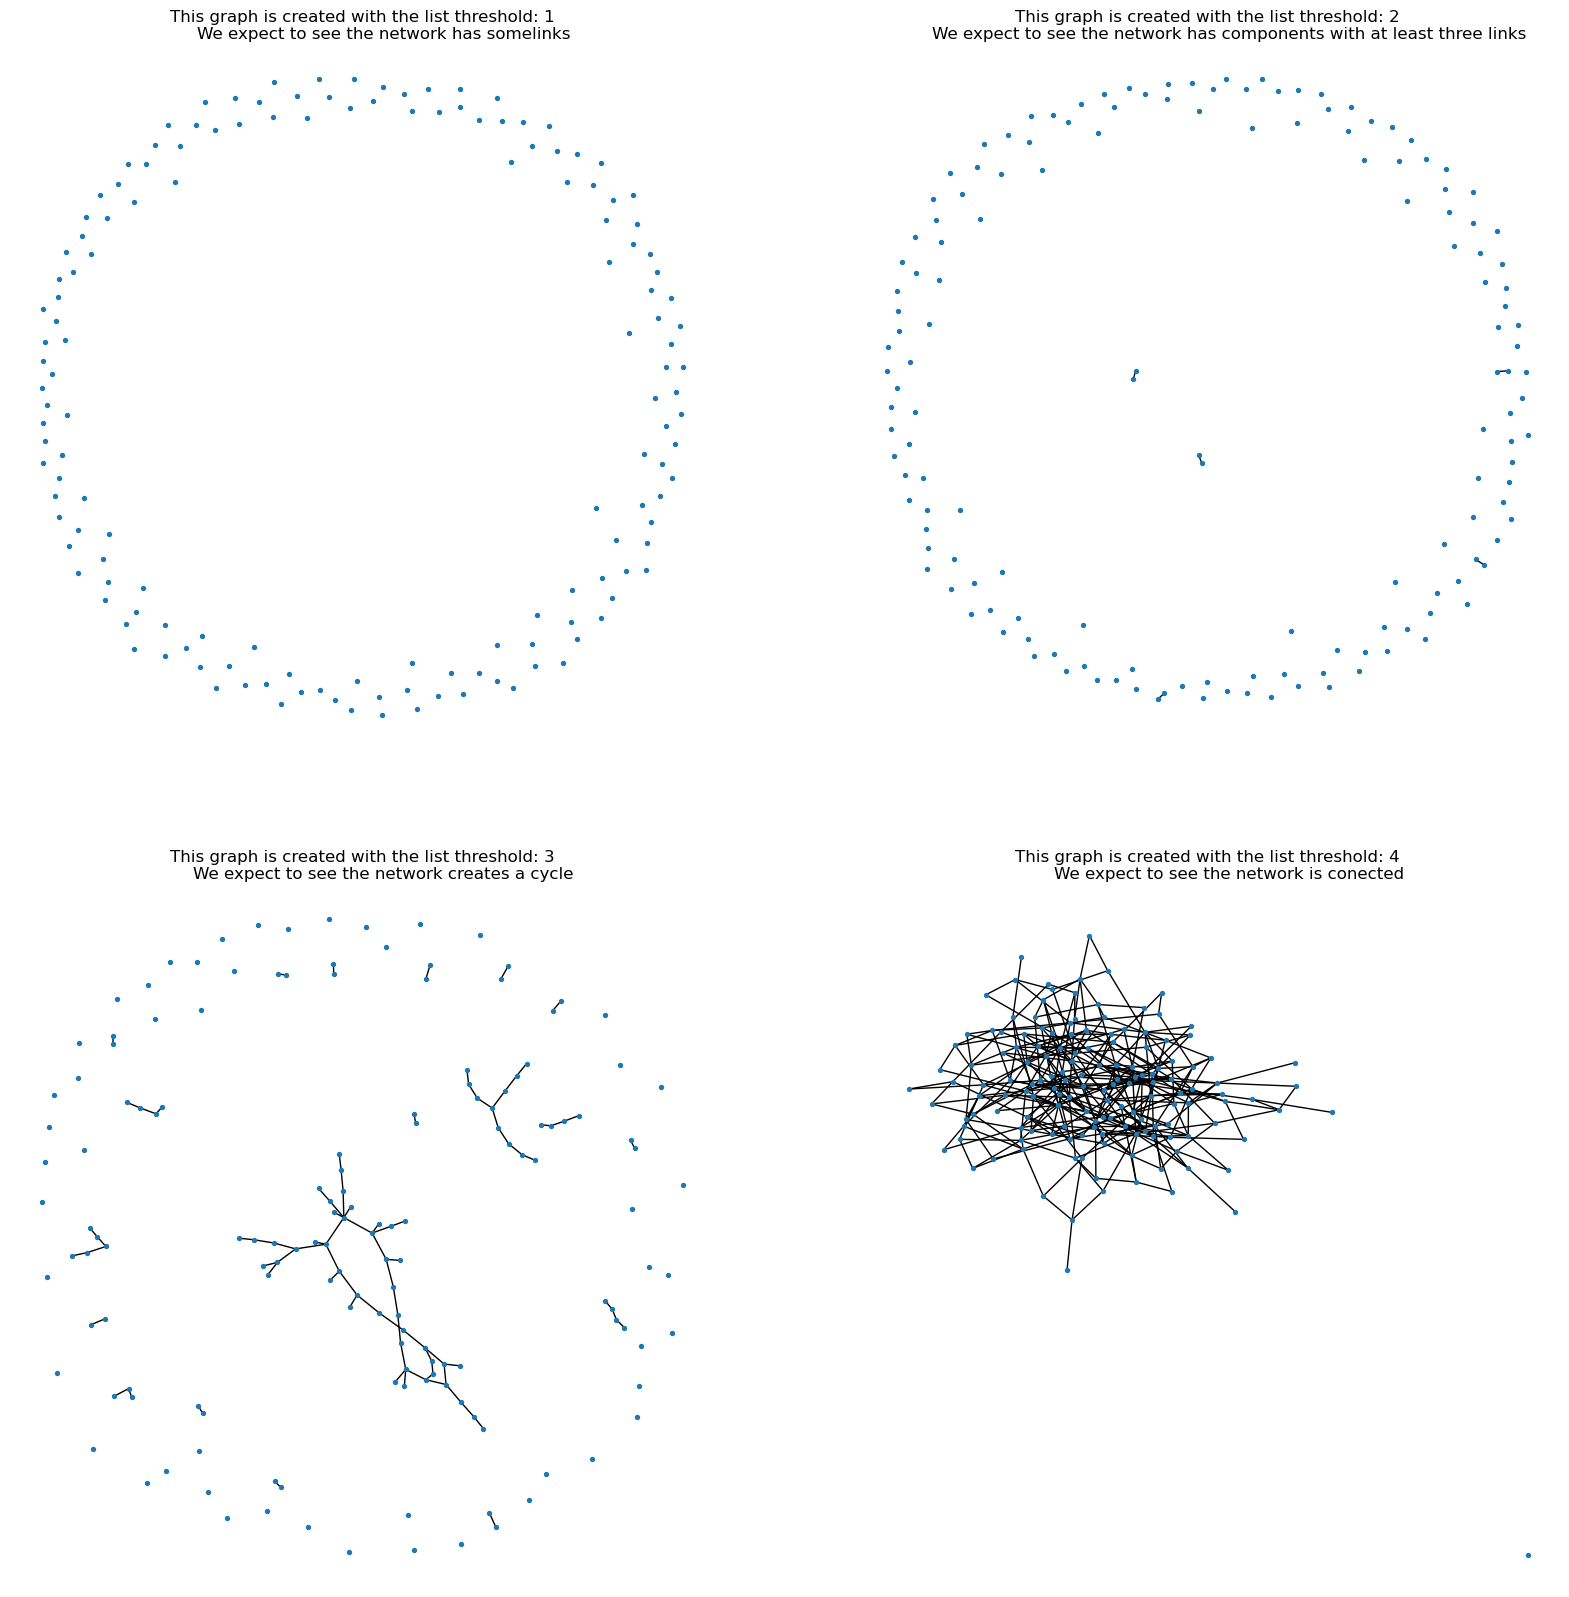

In [12]:
# Some example data
epsilon = 0.000005
n = 150 
p_1 = 1/(n**2) + epsilon 
p_2 = 1/n**(3/2) + epsilon
p_3 = 1/n + epsilon
p_4 = math.log(n)/n + epsilon

p_list = [p_1,p_2,p_3,p_4]
what_we_expect_to_see = [str('the network has somelinks'), str('the network has components with at least three links'),
                         str('the network creates a cycle'),str('the network is conected')]

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Loop over the list of probabilities
i = 0
for row in range(2):
    for col in range(2):
        # Create a random graph with n nodes and p probability of edge creation
        p = p_list[i]
        G = nx.gnp_random_graph(n, p)

        # Plot the graph on the corresponding subplot
        axs[row, col].set_title(f"""This graph is created with the list threshold: {i+1}
        We expect to see {what_we_expect_to_see[i]}""")
        nx.draw(G, with_labels=False, ax=axs[row, col],node_size=8)
        print(f"")
        i = i + 1

# Show the figure
plt.show()

This threshold are very interesting! we can see how after certain point all the graph is getting conected!

In [15]:
# load graph object from file
G = pickle.load(open('filename.pickle', 'rb'))
# we know that this graph has a few nodes not connected. But we need to consider that this is the case because we take
# away the nodes (actors/actresses and directors) that work in just a few movies 

In [28]:
# we have in the (2) notebook in this folder that the probability of connecting to other node is 0.017230679156908665 and that the n was 5125
# So we have:

n_network = 5125
p_network = 0.017230679156908665

# let us calculate the threshold 

i = 1
for p in p_list:
    # we substract epsilon to keep just the threshold
    if p_network > p - epsilon:
        print(f"the network is greater that the {i} threshold")
        print(f" p_network should be greater than this value: {round((p - epsilon),3)}")
    else:
        print(f"the network is lower that the {i} threshold")
        print(f" p_network should be greater than this value: {round((p - epsilon),3)}")
    i = i + 1

the network is greater that the 1 threshold
 p_network should be greater than this value: 0.0
the network is greater that the 2 threshold
 p_network should be greater than this value: 0.001
the network is greater that the 3 threshold
 p_network should be greater than this value: 0.007
the network is lower that the 4 threshold
 p_network should be greater than this value: 0.033


So if the connection were at random we would also expect to see a not fully connected network giving the connection we have